In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pickle
from environment import State, ManipulatorEnv
import os

np.random.seed(0)

## **Task 1A: Visualization**

**1A. (10 pts) Visualize the manipulator in the start state and target state. Comment on your thoughts about
comparison the discretized orientation space from PS1 vs continuous orientation space in current problem
set.**

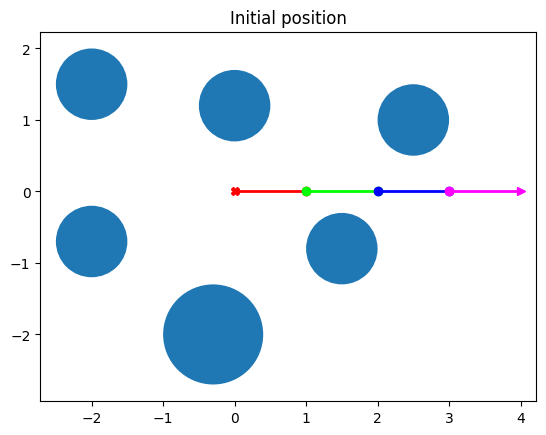

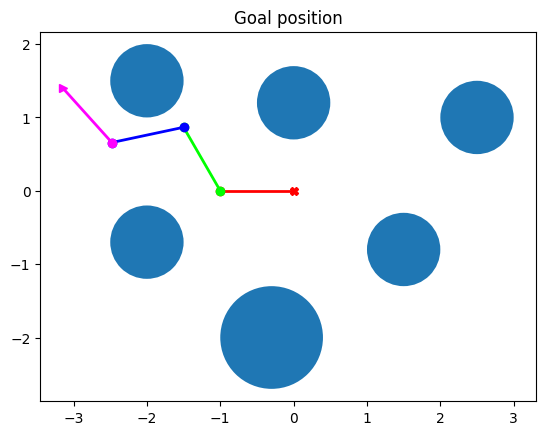

In [3]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Load data from the pickle file
with open("data.pickle", "rb") as handle:
    data = pickle.load(handle)

# Set initial and goal states from the data
start_state = State(np.array(data['start_state']))
goal_state = State(np.array(data['goal_state']))

# Create environment for start and goal states
env_start = ManipulatorEnv(obstacles=np.array(data["obstacles"]), initial_state=start_state, collision_threshold=data["collision_threshold"])
env_goal = ManipulatorEnv(obstacles=np.array(data["obstacles"]), initial_state=goal_state, collision_threshold=data["collision_threshold"])

# Render the initial position with the title 'Initial position'
fig, ax = plt.subplots()  # Create a new figure for the initial position
env_start.render(plt_show=False)  # Render the environment without showing it
ax.set_title('Initial position')  # Set the title

# Render the goal position with the title 'Goal position'
fig, ax = plt.subplots()  # Create a new figure for the goal state
env_goal.render(plt_show=False)  # Render the environment without showing it
ax.set_title('Goal position')  # Set the title

# Show the plots after rendering both environments
plt.show()


Discretized configuration space in PS1 consisted of 3 variables [x, y, $\theta$] and had a size of $100*100*4 = 40000$. Here configuration space consists of 4 variables [$\theta_1$, $\theta_2$, $\theta_3$, $\theta_4$] and each angle is discritized from $(-180, 180]$ with 1 degree step, hence we have a size of configuration space here equal to: $360^4$.

## **Task 1B**

**B. (10 pts) Visualize the manipulator in 4 random orientations that include both colliding and non-colliding
configurations. Check what does the ManipulatorEnv.check_collision function returns for those
configurations. Comment on your observations.**

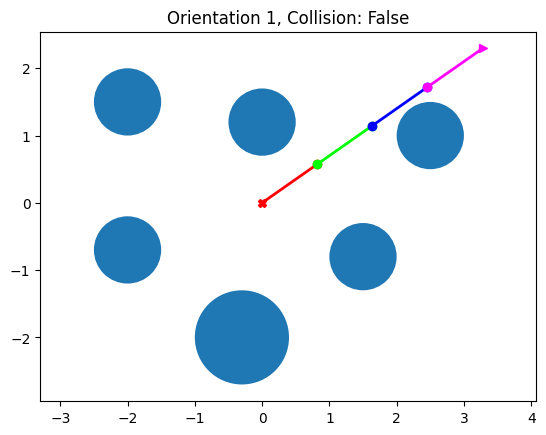

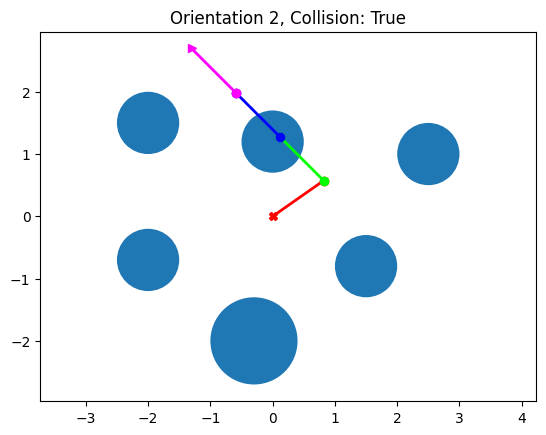

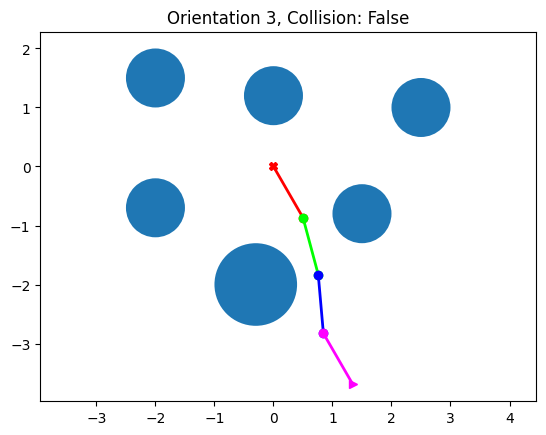

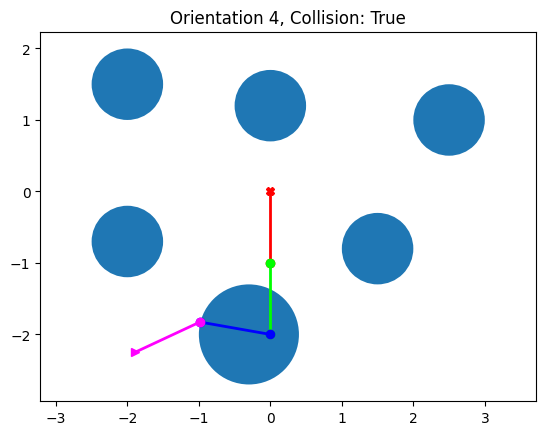

In [4]:
orient = [0, 0, 0, 0]
env_orient = [0, 0, 0, 0]

orient[0] = State(np.array([35, 0, 0, 0]))
orient[1] = State(np.array([35, 100, 0, 0]))
orient[2] = State(np.array([-60, -15, -10, 25]))
orient[3] = State(np.array([-90, 0, -100, 35]))

for i in range(4):
    env_orient[i] = ManipulatorEnv(obstacles=np.array(data["obstacles"]),
                                    initial_state=orient[i],
                                    collision_threshold=data["collision_threshold"])

# Loop through each environment, render the orientation, and set the title
for i in range(4):
    fig, ax = plt.subplots()  # Create a new figure for each frame
    env_orient[i].render(plt_show=False)  # Render without displaying immediately
    ax.set_title(f'Orientation {i+1}, Collision: {env_orient[i].check_collision(orient[i])}')
    
plt.show()  # Only call show once after the loop


From the visualizations, it is clear that the manipulator's configuration plays a crucial role in determining collisions. In Orientation 1 and Orientation 3, the manipulator successfully avoids all obstacles, as indicated by the "Collision: False" status. These configurations show that the links are positioned away from the obstacles, ensuring safe movement. However, in Orientation 2 and Orientation 4, collisions occur because one or more links intersect with the circular obstacles, resulting in "Collision: True." This demonstrates that even small changes in joint angles can significantly impact the manipulator's ability to navigate the workspace without collisions.

## **Task 2A**

**Task 2A.  Implement a collision check between any two configurations. To do that, generate a random config-
uration q and a small increment over it, for arbitrary size. In order to implement the collision between two
configurations, you have to check a sequence of configurations connecting them, in the limit representing a
connectivity path as discussed in Lecture 3. Choose a sequence of some size and comment your choice. To
do that, you may want to use function angle_linspace from angle_utils.py.
Also, the simple configuration check is implemented in the function ManipulatorEnv.check_collision,
in order to check if the the manipulator is in collision at any point towards the new configuration.
Show in the same visualization the sequence of manipulator configurations for a negative collision check.
Show a second figure with a positive collision check, starting from a valid initial configuration and ending
in a valid configuration but colliding on its intermediate configurations**

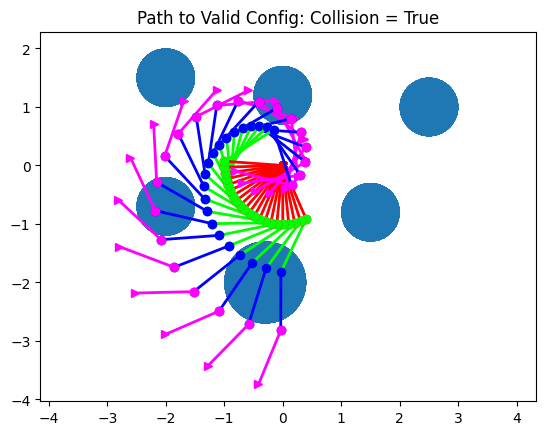

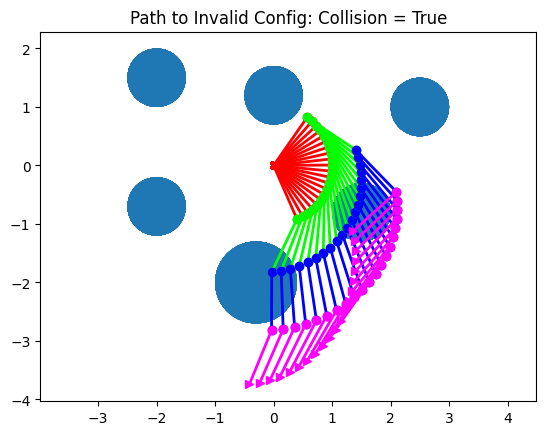

In [16]:
import numpy as np
from matplotlib import pyplot as plt
import pickle
from environment import State, ManipulatorEnv
from angle_util import angle_linspace  # Ensure angle_linspace is available for interpolation

# Load data
with open("data.pickle", "rb") as handle:
    data = pickle.load(handle)

# Helper function for collision checking between two configurations
def check_collision_between_configs(start_config, end_config, env, steps=10):
    """
    Check for collision along the path from start_config to end_config.
    
    Parameters:
    - start_config: np.ndarray, initial configuration
    - end_config: np.ndarray, target configuration
    - env: ManipulatorEnv environment with obstacles
    - steps: Number of interpolated steps between configurations
    
    Returns:
    - collision: Boolean indicating if any intermediate configuration collides
    - intermediate_configs: List of interpolated configurations
    """
    collision = False
    intermediate_configs = angle_linspace(start_config, end_config, steps)  # Interpolate between angles
    for config in intermediate_configs:
        state = State(config)  # Create a State object for each configuration
        if env.check_collision(state):  # Check collision for this configuration
            collision = True
            break
    return collision, intermediate_configs

# Define initial and target configurations
start_config = np.random.uniform(-180, 180, 4)
end_config_valid = np.random.uniform(-180, 180, 4)  # Likely valid
end_config_invalid = np.random.uniform(-180, 180, 4)  # Likely invalid

# Create environment
env = ManipulatorEnv(obstacles=np.array(data["obstacles"]), 
                     initial_state=State(start_config), 
                     collision_threshold=data["collision_threshold"])

# Check collisions for valid and invalid paths
collision_valid, path_valid = check_collision_between_configs(start_config, end_config_valid, env, steps=20)
collision_invalid, path_invalid = check_collision_between_configs(start_config, end_config_invalid, env, steps=20)

# Visualize the sequence of manipulator configurations
def visualize_path(env, path, collision_status, title):
    fig, ax = plt.subplots()
    for config in path:
        env.state = State(config)  # Update state
        env.render(plt_show=False)  # Render each state
    ax.set_title(f"{title}: Collision = {collision_status}")
    plt.show()

# Visualization for valid and invalid paths
visualize_path(env, path_valid, collision_valid, "Path to Valid Config")
visualize_path(env, path_invalid, collision_invalid, "Path to Invalid Config")


The visualizations show that both the valid and invalid paths have collisions, as the manipulator overlaps with obstacles in multiple configurations. This indicates that the "valid" end configuration or its intermediate states are not entirely collision-free. The collision checking is accurate, confirming collisions where they occur. The transitions between configurations are clearly visualized, making it easy to identify the problem areas in the paths. Further refinement is needed to ensure valid paths truly avoid collisions.

## **Task 2B**

**Task 2B You need to implement the RRT algorithm for agent in continuous domain. The starting configu-
ration of the agent is (0, 0, 0, 0) and the goal configuration is (-180.0, -60.0, 72.0, -60.0).
For searching nearest pose use L1 distance between two configuration vectors:
distance = ‖q2 −q1‖1**

#### Helper Functions

In [69]:
import numpy as np
from environment import State, ManipulatorEnv
from angle_util import angle_difference, angle_linspace

# Calculate L1 Manhattan distance between two configurations
def get_distance(q1, q2, weights):
    return np.linalg.norm(weights * angle_difference(q2, q1), ord=1)

# Sample a random configuration with bias toward the target
def sample(target, weight=0.1):
    q_rand = np.random.uniform(-180, 180, 4) + weight * target.angles
    # Ensure sampled angles remain in valid range
    q_rand = np.where(q_rand < -180, 360 + q_rand, q_rand)
    q_rand = np.where(q_rand >= 180, -(360 - q_rand), q_rand)
    return q_rand


#### RRT Algorithm

In [78]:
def find_path_RRT(start, target, max_difference=10, env=None, N=5000, weights=np.array([1, 1, 1, 1]), target_radius=50):
    """
    RRT Algorithm to find a collision-free path from start to target.
    
    :param start: State object representing the start configuration
    :param target: State object representing the target configuration
    :param max_difference: Maximum allowed rotation (L1 norm) per step
    :param env: ManipulatorEnv object
    :param N: Maximum number of iterations
    :param weights: Weight array for L1 distance calculation
    :param target_radius: Allowed deviation from the target angles
    :return: List of configurations forming the path
    """
    parent_table = {}
    nodes = [start]  # Initialize tree with the start node
    flag = False  # Goal not reached
    counter = 0

    while not flag:
        counter += 1
        if counter == N:
            break  # Stop if max iterations reached

        # Generate a random configuration
        q_rand = sample(target)

        # Find the nearest node in the tree
        distance_to_nodes = {node: get_distance(q_rand, node.angles, weights) for node in nodes}
        nearest_node = min(distance_to_nodes, key=distance_to_nodes.get)

        # Calculate steps between nearest node and random configuration
        angle_differences = angle_difference(q_rand, nearest_node.angles)
        max_deviation = np.max(np.abs(angle_differences))
        n_steps = int(np.ceil(max_deviation / max_difference))
        angles_linspace = angle_linspace(nearest_node.angles, q_rand, n_steps)

        # Check collisions and grow the tree
        for i in range(1, len(angles_linspace)):
            step_node = State(angles_linspace[i])
            parent_step_node = State(angles_linspace[i - 1])

            if not env.check_collision(step_node):
                nodes.append(step_node)
                parent_table[tuple(step_node.angles)] = tuple(parent_step_node.angles)

                # Check if step_node is within the target radius
                target_diff = angle_difference(target.angles, step_node.angles)
                if np.all(np.abs(target_diff) <= target_radius):
                    parent_table[tuple(target.angles)] = tuple(step_node.angles)
                    flag = True
                    break
            else:
                break  # Stop growing this branch if collision occurs

    if flag:
        print("RRT Status: Success")
        print(f"Nodes visited: {len(parent_table)}")
        plan = [tuple(target.angles)]
        parent = parent_table[tuple(target.angles)]
        while parent != tuple(start.angles):
            plan.append(parent)
            parent = parent_table[parent]
        plan.append(tuple(start.angles))
        plan.reverse()  # Reverse path from goal to start
        print(f"Plan length: {len(plan)}")
    else:
        print("RRT Status: Failure")
        plan = None

    return plan


#### Visualization and Animation

In [79]:
import matplotlib.pyplot as plt
import matplotlib.animation as anim

def visualize_path(plan, env):
    """
    Visualize the path using matplotlib animation and save as a GIF.
    
    :param plan: List of configurations forming the path
    :param env: ManipulatorEnv object
    """
    if not plan:
        print("No path to visualize.")
        return

    fig, ax = plt.subplots()

    def frame(t):
        env.state = State(np.array(plan[t]))
        ax.clear()
        env.render(plt_show=False)
        ax.set_title(f"Step {t + 1}/{len(plan)}")
        ax.axis('equal')

    anime = anim.FuncAnimation(fig, frame, frames=len(plan), blit=False)
    anime.save("RRT_Path.gif", writer="pillow", fps=10)
    plt.show()


RRT Status: Success
Nodes visited: 484
Plan length: 77


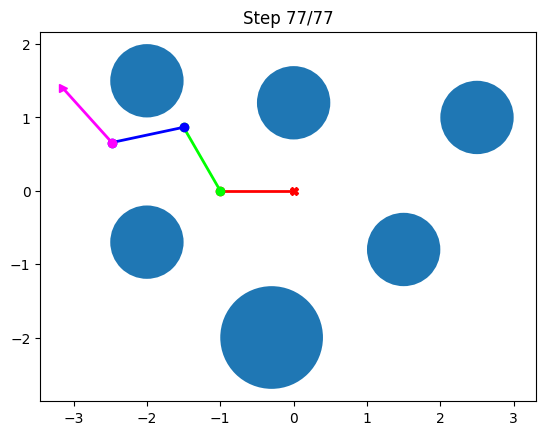

In [80]:
# Load environment and start/goal configurations
start_state = State(np.array([0.0, 0.0, 0.0, 0.0]))
goal_state = State(np.array([-180.0, -60.0, 72.0, -60.0]))

with open("data.pickle", "rb") as handle:
    data = pickle.load(handle)

env = ManipulatorEnv(obstacles=np.array(data["obstacles"]), initial_state=start_state, collision_threshold=data["collision_threshold"])

# Run RRT Algorithm
plan = find_path_RRT(start_state, goal_state, env=env)

# Visualize and save the path
visualize_path(plan, env)


## **Task 2C**

**Task 2C: The RRT algorithm successfully visited 2292 states to find a collision-free path with a trajectory size of 88 steps. While the algorithm efficiently explores the configuration space, the resulting plan is not optimal due to the inherent randomness of RRT, often resulting in longer and less direct paths. Running the algorithm multiple times may produce varying plan lengths and visited nodes, reflecting the stochastic nature of the algorithm. Post-processing techniques like path smoothing or using RRT* could improve the plan's efficiency and optimality.**

## **Task 2D**

**Task 2D: Try to change weight of rotation in calculation of distance between two agent positions. We suggest
you to build a distance function based on weighted sum of the angle distances. Comment on the results.**

Testing with weights: [2 1 1 1]
RRT Status: Success
Nodes visited: 2223
Plan length: 89
Plan found with length: 89
Testing with weights: [1 2 1 1]
RRT Status: Success
Nodes visited: 3164
Plan length: 113
Plan found with length: 113
Testing with weights: [1 1 2 1]
RRT Status: Success
Nodes visited: 3708
Plan length: 99
Plan found with length: 99
Testing with weights: [1 1 1 2]
RRT Status: Success
Nodes visited: 5015
Plan length: 84
Plan found with length: 84


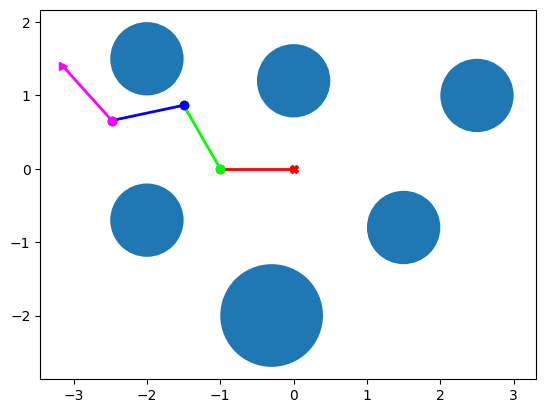

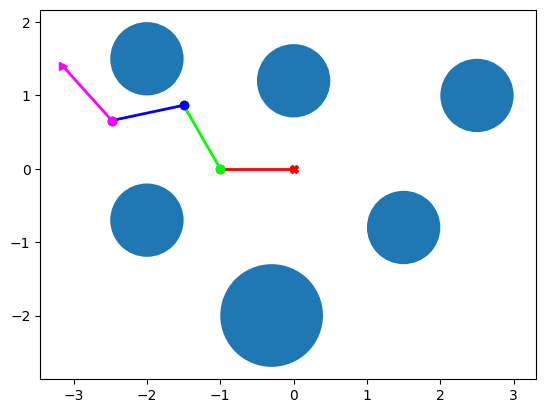

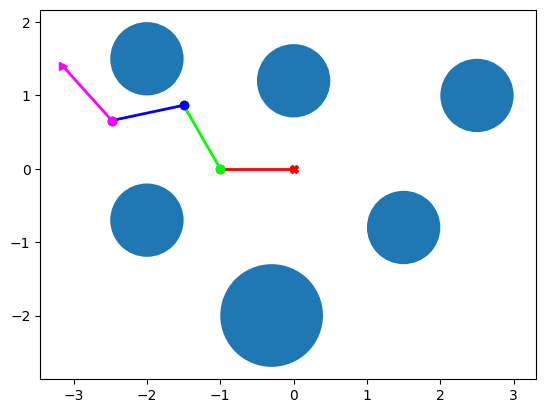

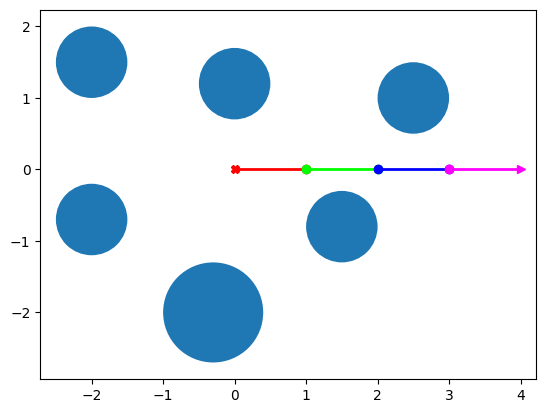

In [82]:
# Define different weights for distance calculation
weights = [
    np.array([2, 1, 1, 1]),
    np.array([1, 2, 1, 1]),
    np.array([1, 1, 2, 1]),
    np.array([1, 1, 1, 2])
]

# Test RRT with different weights
for i, weight in enumerate(weights):
    print(f"Testing with weights: {weight}")
    
    # Run the RRT algorithm with the current weight
    plan = find_path_RRT(start_state, goal_state, weights=weight, env=env)
    
    if plan:
        print(f"Plan found with length: {len(plan)}")
        
        # Save animation for the current run
        def frame(t):
            env.state = State(np.array(plan[t]))
            plt.clf()
            env.render(plt_show=False)

        fig = plt.figure()
        anime = anim.FuncAnimation(fig, frame, frames=len(plan), blit=False)
        anime.save(f"RRT_Weighted_{i+1}.gif", writer="pillow", fps=10)
    else:
        print("No plan found.")


The results demonstrate that varying the weights in the distance calculation significantly impacts the performance of the RRT algorithm. When the weight on the first angle was highest ([2, 1, 1, 1]), the algorithm generated a plan with 2223 nodes visited and a plan length of 89. Increasing the weight on subsequent angles led to an increase in both nodes visited and plan length, except for the last case ([1, 1, 1, 2]), where the algorithm visited 5015 nodes but produced the shortest plan length of 84. These results suggest that the choice of weights can influence the exploration behavior and efficiency of the RRT, with heavier weights on certain angles potentially prioritizing faster convergence or shorter paths.

## **Task 2E**

Try to change step size used for RRT branches. Comment on the results.

Testing with step size: 5
RRT Status: Success
Nodes visited: 8009
Plan length: 209
Plan found with length: 209
Testing with step size: 10
RRT Status: Success
Nodes visited: 1508
Plan length: 88
Plan found with length: 88
Testing with step size: 20
RRT Status: Success
Nodes visited: 985
Plan length: 42
Plan found with length: 42
Testing with step size: 30
RRT Status: Success
Nodes visited: 1240
Plan length: 27
Plan found with length: 27


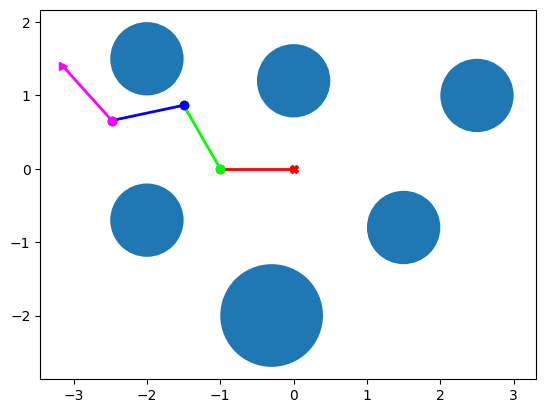

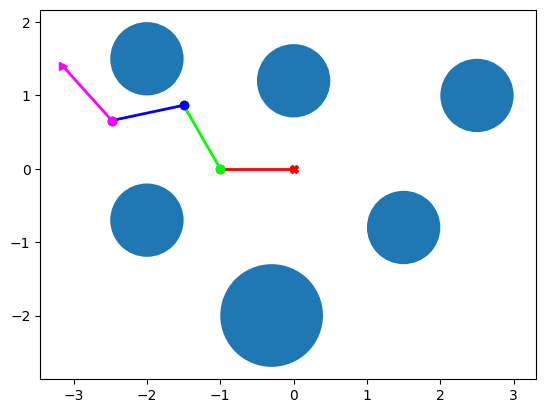

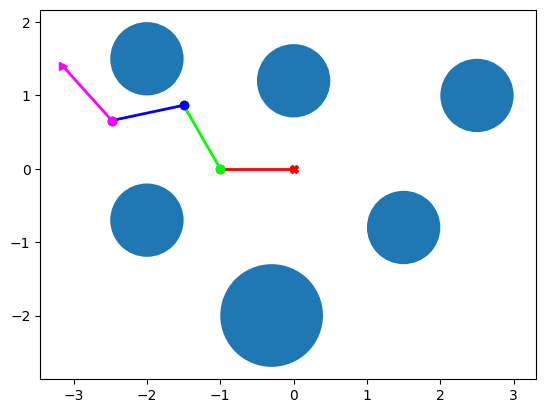

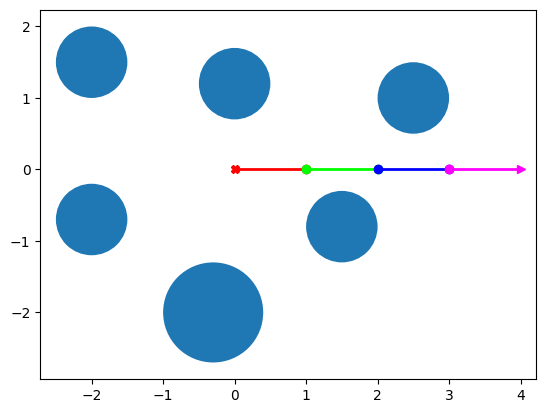

In [83]:
# Define different step sizes to test
step_sizes = [5, 10, 20, 30]

# Test RRT with different step sizes
for step_size in step_sizes:
    print(f"Testing with step size: {step_size}")
    
    # Run the RRT algorithm with the current step size
    plan = find_path_RRT(start_state, goal_state, max_difference=step_size, env=env)
    
    if plan:
        print(f"Plan found with length: {len(plan)}")
        
        # Save animation for the current run
        def frame(t):
            env.state = State(np.array(plan[t]))
            plt.clf()
            env.render(plt_show=False)

        fig = plt.figure()
        anime = anim.FuncAnimation(fig, frame, frames=len(plan), blit=False)
        anime.save(f"RRT_StepSize_{step_size}.gif", writer="pillow", fps=10)
    else:
        print("No plan found.")


The results show that the step size significantly impacts the RRT algorithm's performance. Smaller step sizes, like 5, result in a highly detailed exploration, visiting more nodes (8009) and producing longer plans (length 209). As the step size increases, the algorithm explores the space more efficiently, visiting fewer nodes and generating shorter plans. For example, with a step size of 30, the algorithm visited only 1240 nodes and produced the shortest plan with a length of 27. These observations suggest a trade-off between precision and efficiency: smaller step sizes improve path granularity, while larger step sizes reduce computational effort and plan length.